In [ ]:
import pytket
from pytket.circuit import OpType
from pytket.utils.graph import Graph
from pytket import passes
from pytket.extensions.qiskit import tk_to_qiskit, qiskit_to_tk
from qiskit.converters import circuit_to_dag


In [47]:
from pytket.pauli import Pauli

OpType.TK2

In [34]:
circ = pytket.Circuit(2)
# circ.H(0)
circ.CX(0, 1)
circ.Z(0)

[CX q[0], q[1]; Z q[0]; ]

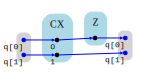

In [35]:
Graph(circ).get_DAG()

In [61]:
passes.CommuteThroughMultis().apply(circ)

False

In [73]:
from pytket.circuit import Circuit, CustomGateDef
from sympy import symbols

a, b = symbols("a b")
def_circ = Circuit(2)
def_circ.CZ(0, 1)
def_circ.Rx(a, 1)
def_circ.CZ(0, 1)
def_circ.Rx(-a, 1)
def_circ.Rz(b, 0)

gate_def = CustomGateDef.define("MyCRx", def_circ, [a])

In [97]:
gate_def.definition.get_unitary()

RuntimeError: Error trying to simulate circuit CZ q[0], q[1];
Rx(a) q[1];
CZ q[0], q[1];
Rz(b) q[0];
Rx(-a) q[1];
Phase (in half-turns): 0.0
 with 2 qubits, 5 commands; U is size 4x4, premultiplying M with 4 rows, 4 cols: GateUnitaryMatrix for op Rx(a) acting on 1 qubits, taking 1 parameters:
param[0] = 0
parameter[0] is symbolic

array([[ 0.79389263-0.4045085j ,  0.        +0.j        ,
         0.        +0.j        , -0.20610737-0.4045085j ],
       [ 0.        +0.j        ,  0.4045085 +0.20610737j,
         0.4045085 -0.79389263j,  0.        +0.j        ],
       [ 0.        +0.j        ,  0.4045085 -0.79389263j,
         0.4045085 +0.20610737j,  0.        +0.j        ],
       [-0.20610737-0.4045085j ,  0.        +0.j        ,
         0.        +0.j        ,  0.79389263-0.4045085j ]])

In [106]:
from pytket.circuit import Op, Command

Op.create(OpType.TK2, [0.5, 0.2, 0.3]).get_unitary()


array([[ 0.79389263-0.4045085j ,  0.        +0.j        ,
         0.        +0.j        , -0.20610737-0.4045085j ],
       [ 0.        +0.j        ,  0.4045085 +0.20610737j,
         0.4045085 -0.79389263j,  0.        +0.j        ],
       [ 0.        +0.j        ,  0.4045085 -0.79389263j,
         0.4045085 +0.20610737j,  0.        +0.j        ],
       [-0.20610737-0.4045085j ,  0.        +0.j        ,
         0.        +0.j        ,  0.79389263-0.4045085j ]])

In [84]:
type(Op.create(OpType.X))

pytket._tket.circuit.Op

In [91]:
circ.get_commands()[0].op.get_unitary()

array([[ 1.+0.j,  0.+0.j],
       [ 0.+0.j, -1.+0.j]])

In [92]:
from pytket.utils.stats import gate_counts


In [94]:
gate_counts(circ)

Counter({OpType.Z: 1, OpType.CX: 1})

In [96]:
Op.create(gate_def, [0.1, 0.2])

TypeError: create(): incompatible function arguments. The following argument types are supported:
    1. create(arg: pytket._tket.circuit.OpType, /) -> pytket._tket.circuit.Op
    2. create(arg0: pytket._tket.circuit.OpType, arg1: typing.Union[sympy.Expr, float], /) -> pytket._tket.circuit.Op
    3. create(arg0: pytket._tket.circuit.OpType, arg1: collections.abc.Sequence[typing.Union[sympy.Expr, float]], /) -> pytket._tket.circuit.Op

Invoked with types: pytket._tket.circuit.CustomGateDef, list

In [37]:
from qiskit.transpiler.passes import CommutationAnalysis
from qiskit.transpiler import PassManager
pm = PassManager(CommutationAnalysis())

comm_ana = CommutationAnalysis()

In [38]:
comm_ana.run(circuit_to_dag(tk_to_qiskit(circ)))

In [39]:
for k,v in comm_ana.property_set['commutation_set'].items():
    print(f"{k}: {v}")

<Qubit register=(2, "q"), index=1>: [[DAGInNode(wire=<Qubit register=(2, "q"), index=1>)], [DAGOpNode(op=Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), qargs=(<Qubit register=(2, "q"), index=0>, <Qubit register=(2, "q"), index=1>), cargs=())], [DAGOutNode(wire=<Qubit register=(2, "q"), index=1>)]]
<Qubit register=(2, "q"), index=0>: [[DAGInNode(wire=<Qubit register=(2, "q"), index=0>)], [DAGOpNode(op=Instruction(name='z', num_qubits=1, num_clbits=0, params=[]), qargs=(<Qubit register=(2, "q"), index=0>,), cargs=()), DAGOpNode(op=Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), qargs=(<Qubit register=(2, "q"), index=0>, <Qubit register=(2, "q"), index=1>), cargs=())], [DAGOutNode(wire=<Qubit register=(2, "q"), index=0>)]]
(DAGOutNode(wire=<Qubit register=(2, "q"), index=1>), <Qubit register=(2, "q"), index=1>): 2
(DAGOpNode(op=Instruction(name='z', num_qubits=1, num_clbits=0, params=[]), qargs=(<Qubit register=(2, "q"), index=0>,), cargs=()), <Qubit registe

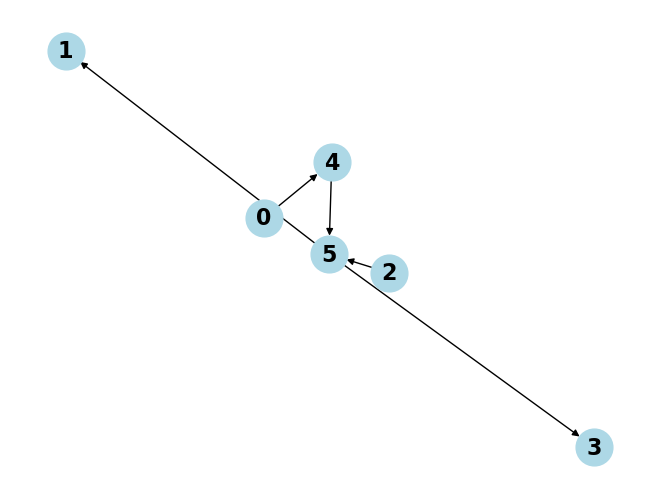

In [26]:
import networkx as nx

nx.draw(Graph(circ).as_nx(), with_labels=True, node_size=700, node_color="lightblue", font_size=16, font_color="black", font_weight="bold")

In [ ]:
from pytket.passes import CommuteThroughMultis